<a href="https://colab.research.google.com/github/yuja1130/AIpython./blob/main/20240531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **키와 몸무게 데이터를 측정ㅇ하여 키 값에 대한 몸무게를 예측**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [24]:
X = [[164], [179], [162], [170]]
y = [53, 63, 55, 59]
regr.fit(X, y)

LinearRegression()

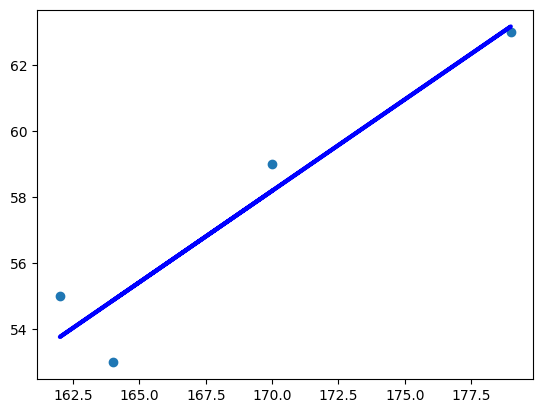

In [25]:
plt.scatter(X, y)
y_pred = regr.predict(X)

plt.plot(X, y_pred, color = "blue", linewidth=3)
plt.show()

## **재배 면적과 수확량이 주어졌을 때 선형 회귀 머신러닝 모델을 완성하고, 모델을 평가한다**

In [26]:
from sklearn import linear_model
regr1 = linear_model.LinearRegression()

a = [[2.1], [10], [3], [1], [3.5], [5], [8]]
b = [64.9, 292.6, 85.9, 30.92, 110.5, 163.4, 163.4]

regr1.fit(a,b)

LinearRegression()

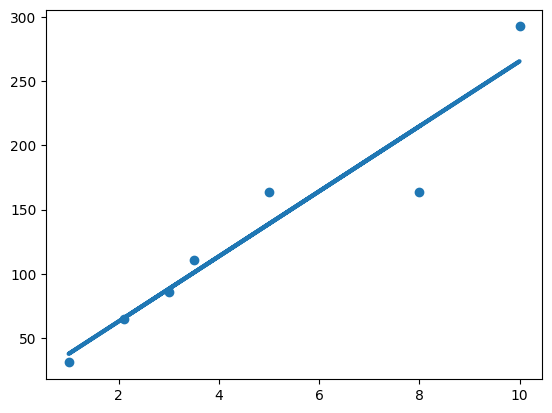

In [28]:
plt.scatter(a, b)
b_pred = regr1.predict(a)

plt.plot(a, b_pred, linewidth=3)
plt.show()

In [29]:
# 예측값 생성 : 재배 면적 7, 12에 대한 수확량 예측
input_data = [[7], [12]]
result = regr1.predict(input_data)
result

array([189.55106566, 316.14785212])

In [30]:
prd = regr1.predict([[7], [12]])
prd

array([189.55106566, 316.14785212])

In [ ]:
# 다 똑같음.
from sklearn import linear_model
regr = linear_model LinearRegression()

from sklearn linear_model import LinearRegression()
regr = LinearRegression()
regr.fit(X, y)

## **부모의 키 데이터를 측정하여 자녀의 키가 속하는 그룹 예측**

In [31]:
# 1. 간단한 샘플 데이터 생성
parents_height = [[180, 165], [175, 160], [180, 172], [165, 160], [171, 152]]
child_height = [3,2,2,1,1]

In [32]:
# 2. scikit-learn 결정트리 모델 생성
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()

In [33]:
# 3. 모델에 데이터 적용
dt_model.fit(parents_height, child_height)

DecisionTreeClassifier()

In [34]:
# 4. 예측하기
dt_pred = dt_model.predict([[175, 153]])
dt_pred

array([2])

In [37]:
import pandas as pd

std_df = pd.read_csv("Student_Marks.csv")
std_df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [40]:
std_df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [41]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [42]:
std_df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [43]:
std_df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [44]:
std_df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


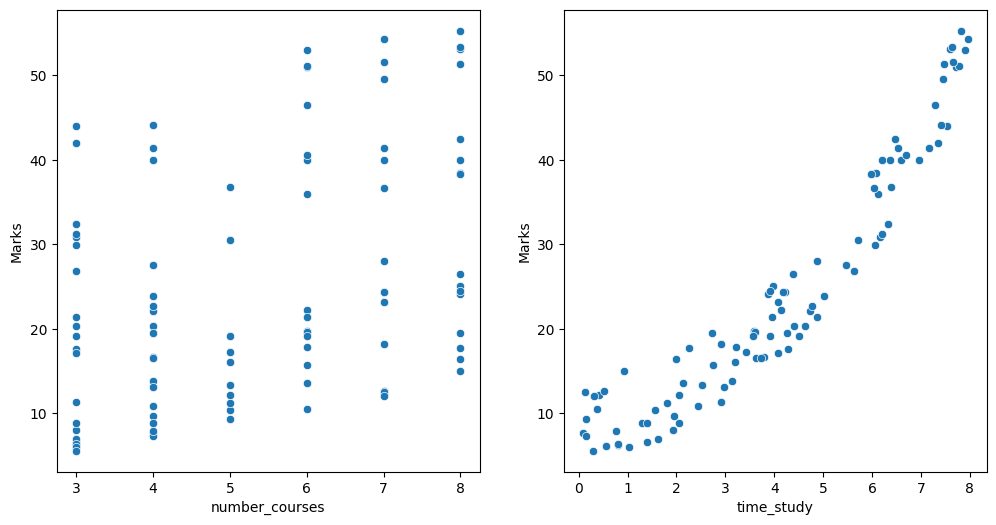

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols = 2, figsize = (12, 6))
sns.scatterplot(data = std_df, x="number_courses", y="Marks", ax=ax[0])
sns.scatterplot(data = std_df, x="time_study", y="Marks", ax=ax[1])
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

x = std_df.drop("Marks", axis=1)
y = std_df["Marks"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)

LinearRegression()

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델 평가하기
lr_pred = lr_model.predict(X_test)


14.200726136374552

**성능 지표 평가**

In [53]:
r2_score(lr_pred, Y_test)

0.9219617777759717

In [54]:
mean_squared_error(lr_pred, Y_test)

14.200726136374552

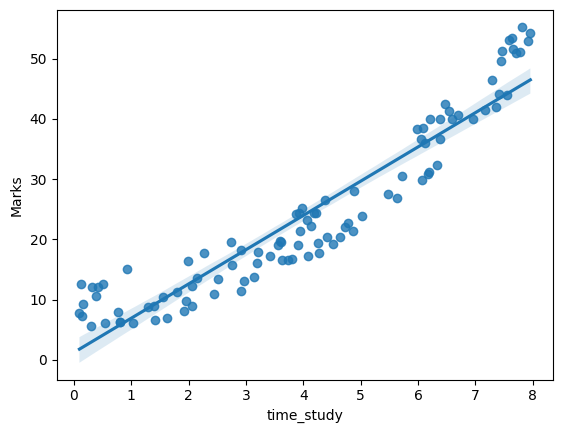

In [51]:
# 시각화
sns.regplot(x=std_df["time_study"], y=std_df["Marks"])
plt.show()